# Z2Pack

## Setup

In [2]:
%%capture
%%bash
pip install z2pack

In [4]:
import tbmodels
import z2pack
import lzma

Uncompress HDF5 file

In [5]:
with lzma.open('wte2_soc.tar.xz') as fin, open('wte2_soc.hdf5', 'wb') as fout:
    fout.write(fin.read())

## Calculate Chern number for WTe$_2$ Weyl node 

In [6]:
model = tbmodels.io.load('wte2_soc.hdf5')

/home/greschd/.virtualenvs/tools_intro/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Create a ``System`` instance for Z2Pack calculations:

In [7]:
z2pack.tb.System?

In [10]:
system = z2pack.tb.System(model)

Calculate the Wannier charge centers on a sphere of radius $r=0.005$ around $\mathbf{k}=(0.1203, 0.05232, 0)$:

In [12]:
z2pack.surface.run?

In [13]:
z2pack.shape.Sphere?

In [16]:
result = z2pack.surface.run(
    system=system, surface=z2pack.shape.Sphere(center=(0.1203, 0.0523, 0), radius=0.005))

Turn down logging to only show warnings:

In [15]:
import logging
logging.getLogger('z2pack').setLevel(logging.WARNING)

Plot Wannier charge center evolution:

<IPython.core.display.Javascript object>


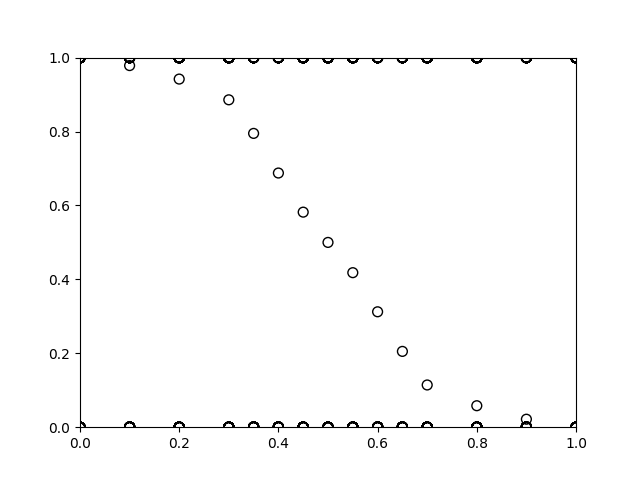

In [19]:
%matplotlib notebook
z2pack.plot.wcc(result, gaps=False);

<IPython.core.display.Javascript object>


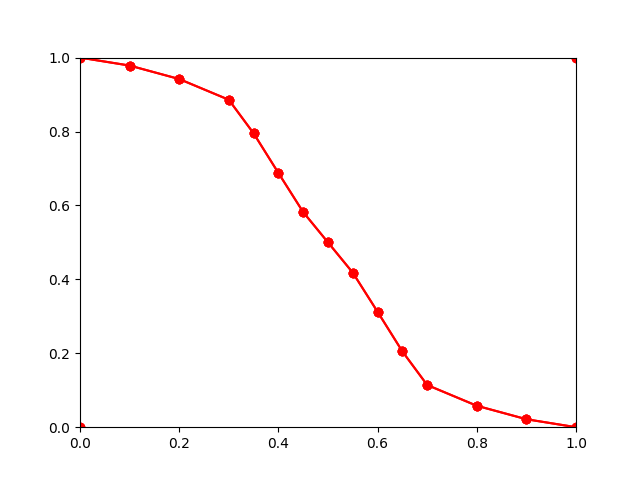

In [20]:
z2pack.plot.chern(result);

In [21]:
z2pack.invariant.chern(result)

-1.0

## $\mathbb{Z}_2$ Invariant

The procedure for calculating the $\mathbb{Z}_2$ invariant is the same, except due to the surface should go only across half the Brillouin zone (between two Kramers-degenerate lines).

In this example, we calculate the $\mathbb{Z}_2$ invariant for a specific set of constants in the Kane-Mele Hamiltonian:

In [29]:
import numpy as np
from numpy import sin, cos, kron, sqrt

In [30]:
identity = np.identity(2, dtype=complex)
pauli_x = np.array([[0, 1], [1, 0]], dtype=complex)
pauli_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
pauli_z = np.array([[1, 0], [0, -1]], dtype=complex)

In [31]:
def kane_mele_hamiltonian(k):
    # Fixed constants:
    t = 1
    lambda_v = 0.1
    lambda_R = 0.05
    lambda_SO = 0.06

    k = np.array(k) * 2 * np.pi
    kx, ky = k
    # change to reduced coordinates
    x = (kx - ky) / 2
    y = (kx + ky) / 2
    return (t * (1 + 2 * cos(x) * cos(y)) * kron(pauli_x, identity) +
            lambda_v * kron(pauli_z, identity) +
            lambda_R * (1 - cos(x) * cos(y)) * kron(pauli_y, pauli_x) +
            -sqrt(3) * lambda_R * sin(x) * sin(y) * kron(pauli_y, pauli_y) +
            2 * t * cos(x) * sin(y) * kron(pauli_y, identity) + lambda_SO *
            (2 * sin(2 * x) - 4 * sin(x) * cos(y)) * kron(pauli_z, pauli_z) +
            lambda_R * cos(x) * sin(y) * kron(pauli_x, pauli_x) +
            -sqrt(3) * lambda_R * sin(x) * cos(y) * kron(pauli_x, pauli_y))

Create a ``System`` instance from an explicit Hamiltonian function. The dimensionality of the system must be passed explicitly since there is no way to infer it:

In [33]:
system = z2pack.hm.System(
    kane_mele_hamiltonian,
    dim=2
)

Calculate the Wannier charge center evolution across half the Brillouin zone:

In [ ]:
result = z2pack.surface.run(
    system=system,
    surface=lambda s, t: [s / 2, t]
)

The surface must be periodic / closed in the _second_ argument.

<IPython.core.display.Javascript object>


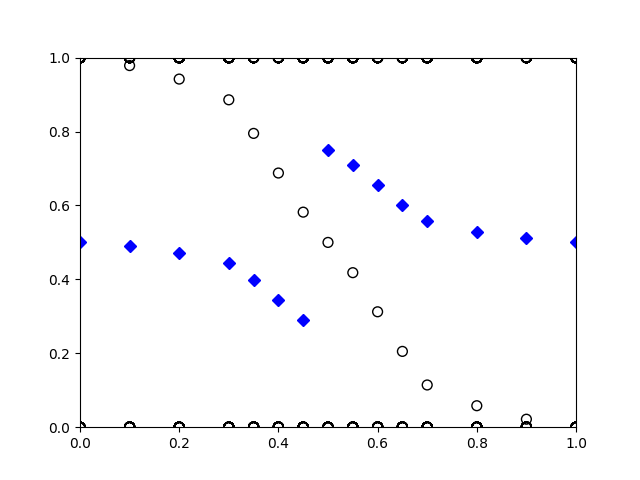

In [35]:
z2pack.plot.wcc(result);

In [36]:
z2pack.invariant.z2(result)

1